In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

import datetime

from scipy.stats import spearmanr

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

pd.set_option('display.max_columns', None)
# colab help: To download notebook (to run in jupyter notebook instead of colab) - Open File menu > Open Download > Select "Download .ipynb"

# Data Import

In [ ]:
datafile_path = "/content/Global YouTube Statistics.csv"
data = pd.read_csv(datafile_path, encoding = "ISO-8859-1")
# colab help: Open Folder icon in the left panel (below the icon {x}) > import "Global YouTube Statistics.csv" file

In [ ]:
data.shape

(995, 28)

In [ ]:
data.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


# Basic Statistics

shape (995, 28)
rank
null 0
count    995
mean     498
std      287
min        1
25%      249
50%      498
75%      746
max      995
Name: rank, dtype: int64


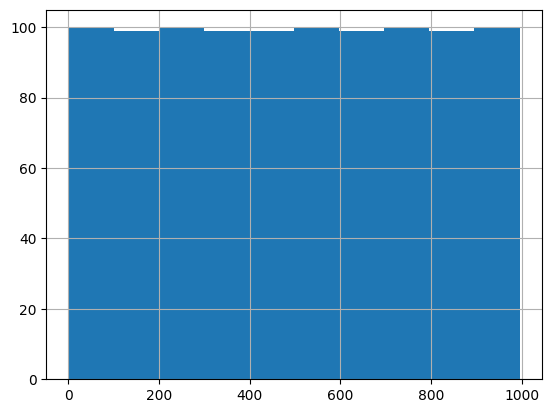

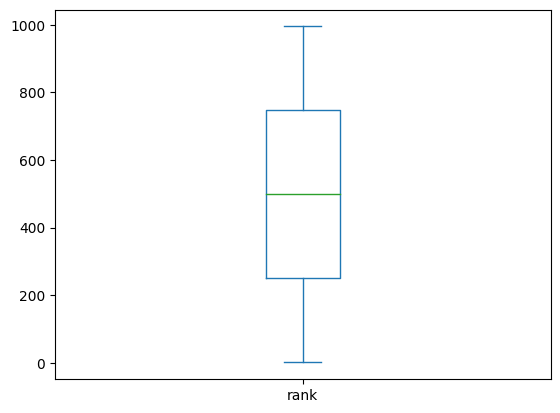



subscribers
null 0
count          995
mean      22982412
std       17526105
min       12300000
25%       14500000
50%       17700000
75%       24600000
max      245000000
Name: subscribers, dtype: int64


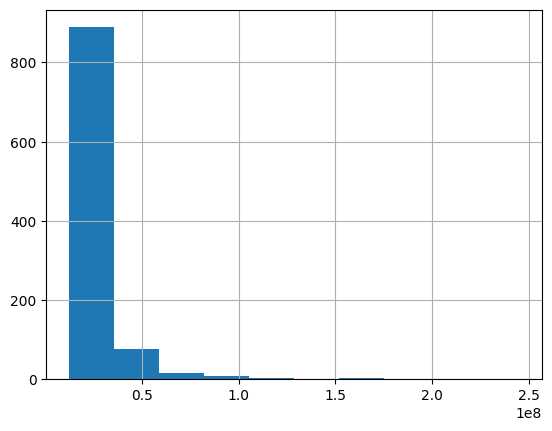

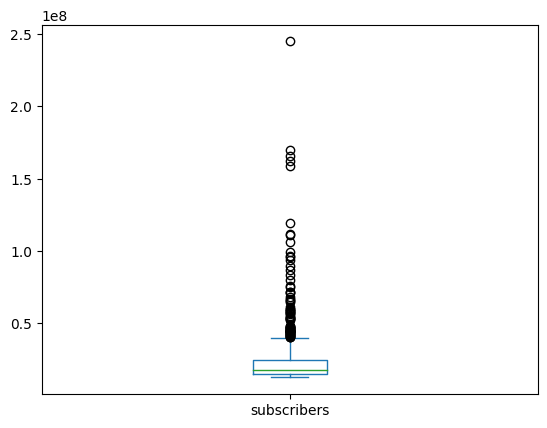



video views
null 0
count             995
mean      11039537052
std       14110844376
min                 0
25%        4288145410
50%        7760819588
75%       13554701853
max      228000000000
Name: video views, dtype: int64


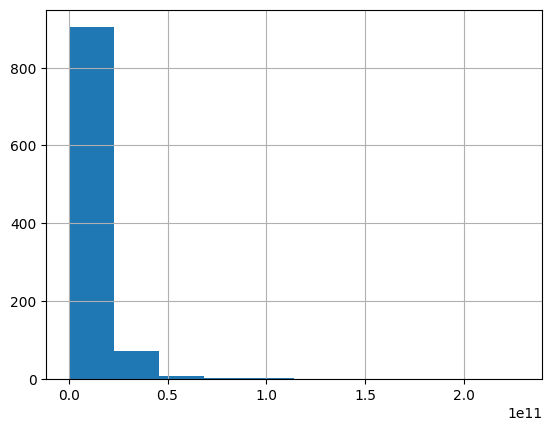

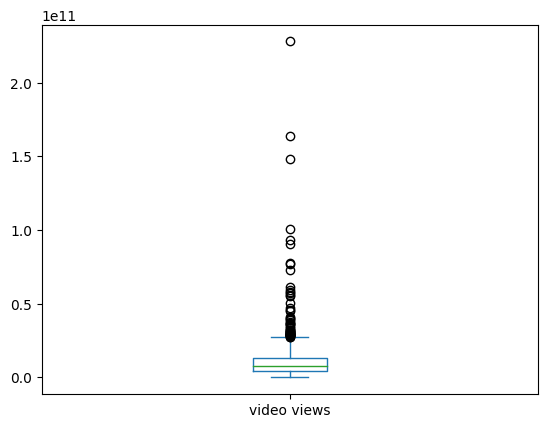



uploads
null 0
count       995
mean       9187
std       34151
min           0
25%         194
50%         729
75%        2667
max      301308
Name: uploads, dtype: int64


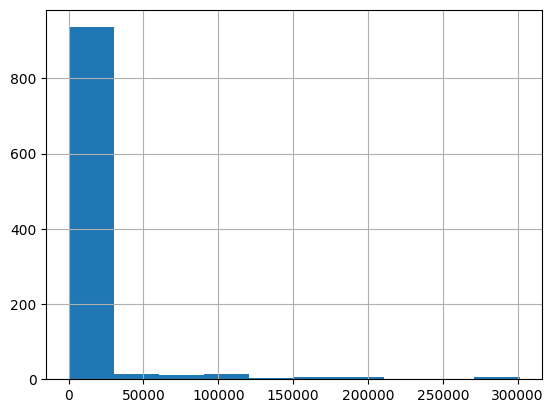

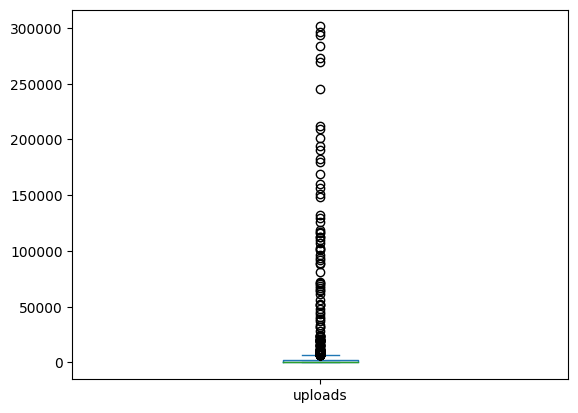



video_views_rank
null 1
count        994
mean      554248
std      1362782
min            1
25%          323
50%          915
75%         3584
max      4057944
Name: video_views_rank, dtype: int64


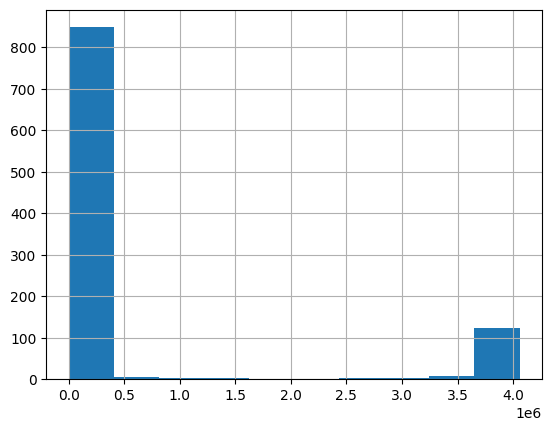

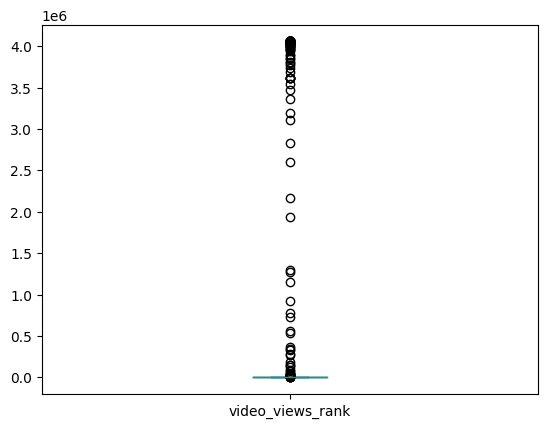



country_rank
null 116
count     879
mean      386
std      1232
min         1
25%        11
50%        51
75%       123
max      7741
Name: country_rank, dtype: int64


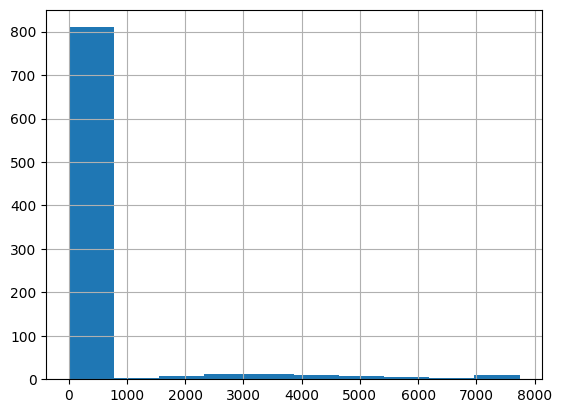

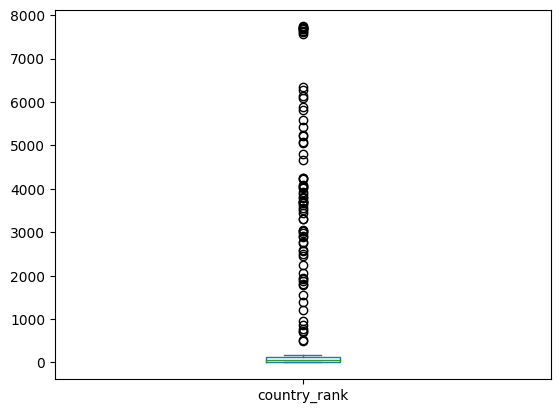



channel_type_rank
null 33
count     962
mean      745
std      1944
min         1
25%        27
50%        65
75%       139
max      7741
Name: channel_type_rank, dtype: int64


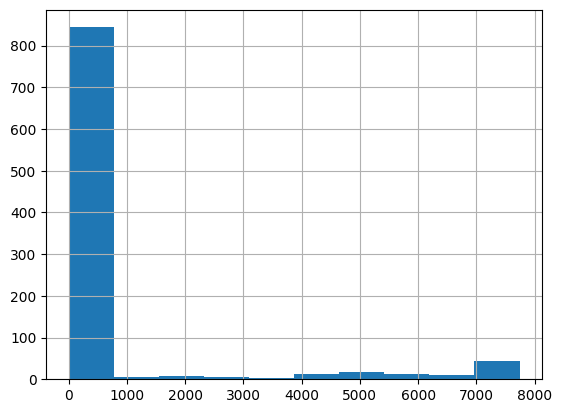

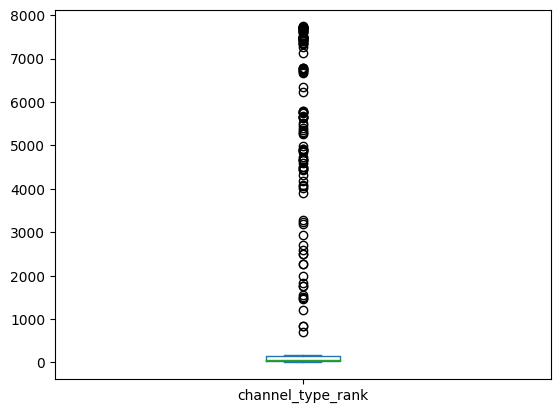



video_views_for_the_last_30_days
null 56
count           939
mean      175610284
std       416378166
min               1
25%        20137500
50%        64085000
75%       168826500
max      6589000000
Name: video_views_for_the_last_30_days, dtype: int64


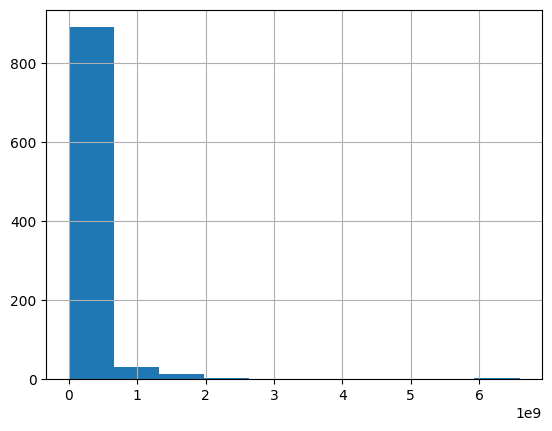

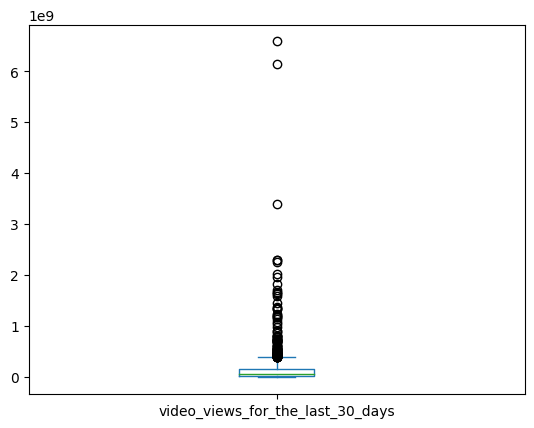



lowest_monthly_earnings
null 0
count       995
mean      36886
std       71858
min           0
25%        2700
50%       13300
75%       37900
max      850900
Name: lowest_monthly_earnings, dtype: int64


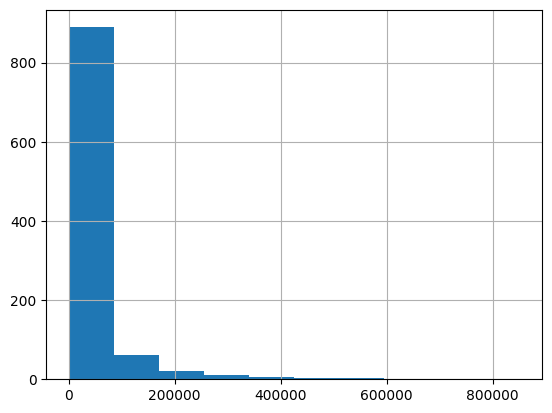

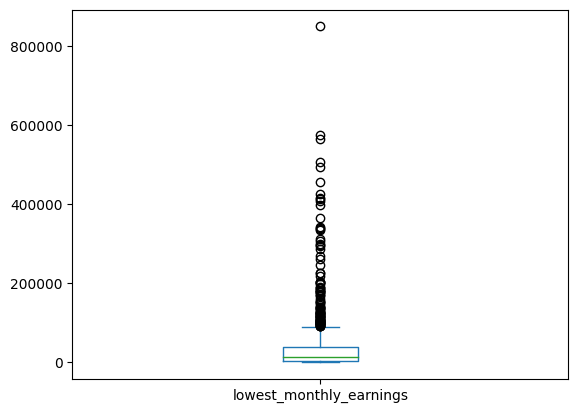



highest_monthly_earnings
null 0
count         995
mean       589807
std       1148622
min             0
25%         43500
50%        212700
75%        606800
max      13600000
Name: highest_monthly_earnings, dtype: int64


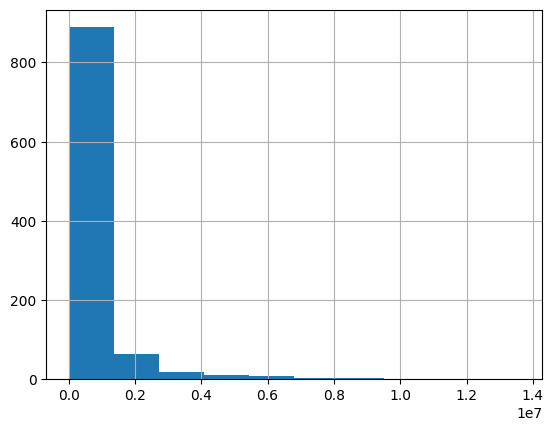

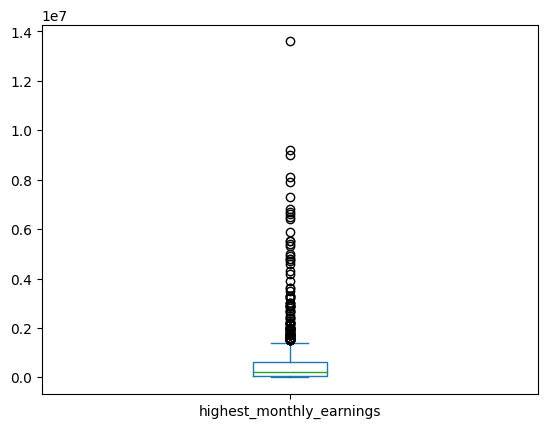



lowest_yearly_earnings
null 0
count         995
mean       442257
std        861216
min             0
25%         32650
50%        159500
75%        455100
max      10200000
Name: lowest_yearly_earnings, dtype: int64


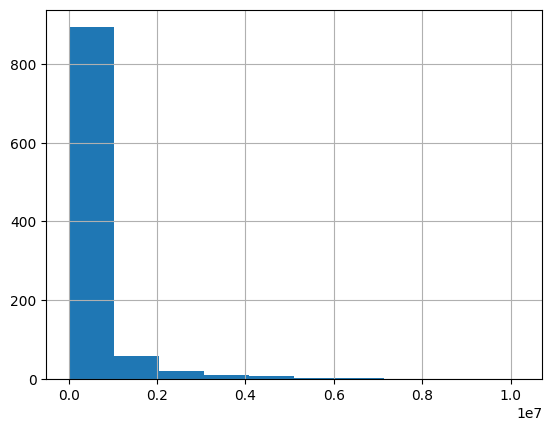

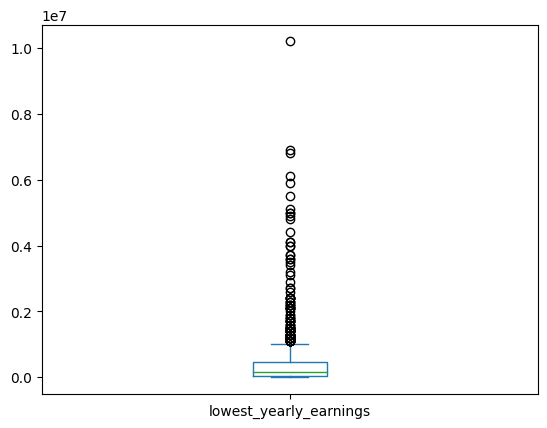



highest_yearly_earnings
null 0
count          995
mean       7081813
std       13797037
min              0
25%         521750
50%        2600000
75%        7300000
max      163400000
Name: highest_yearly_earnings, dtype: int64


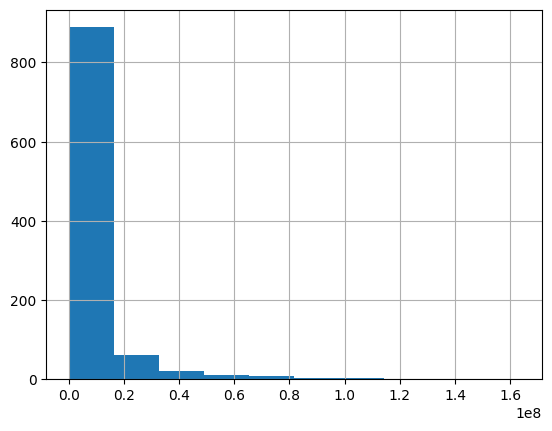

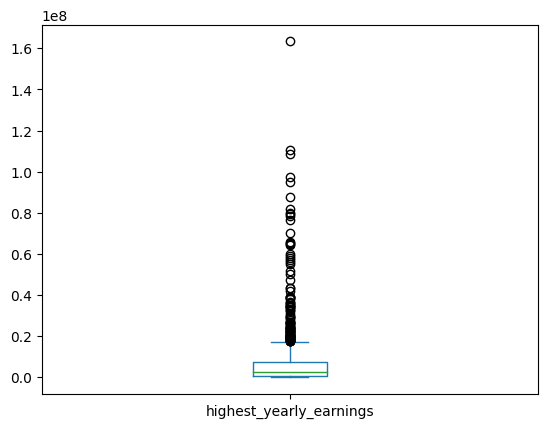



subscribers_for_last_30_days
null 337
count        658
mean      349079
std       614355
min            1
25%       100000
50%       200000
75%       400000
max      8000000
Name: subscribers_for_last_30_days, dtype: int64


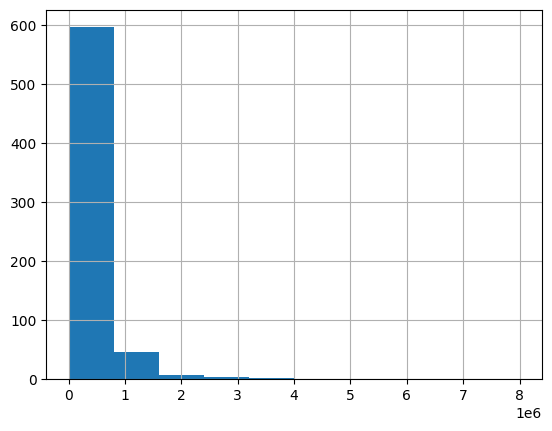

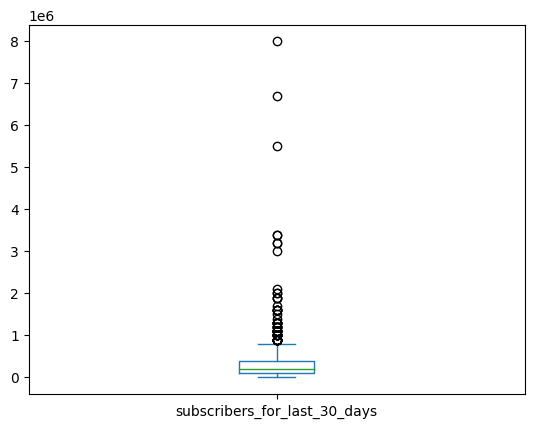



created_year
null 5
count     990
mean     2012
std         4
min      1970
25%      2009
50%      2013
75%      2016
max      2022
Name: created_year, dtype: int64


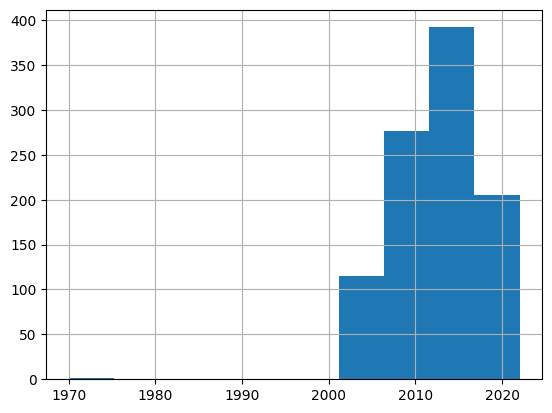

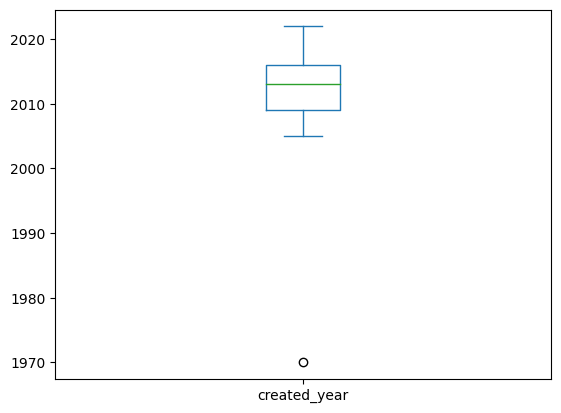



created_date
null 5
count    990
mean      15
std        8
min        1
25%        8
50%       16
75%       23
max       31
Name: created_date, dtype: int64


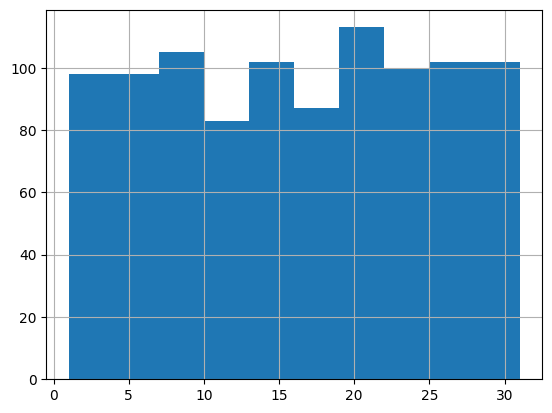

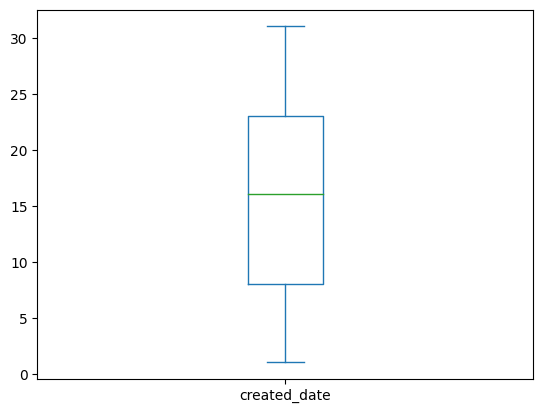



Gross tertiary education enrollment (%)
null 123
count    872
mean      63
std       26
min        7
25%       36
50%       68
75%       88
max      113
Name: Gross tertiary education enrollment (%), dtype: int64


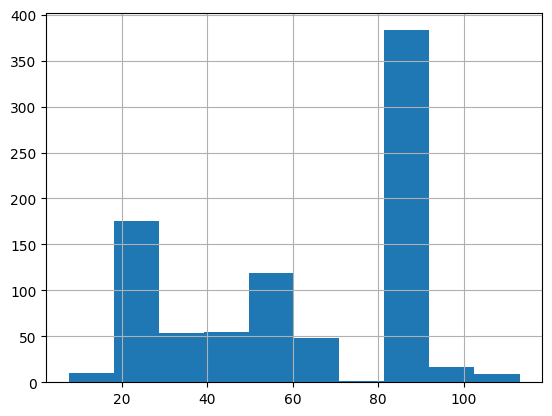

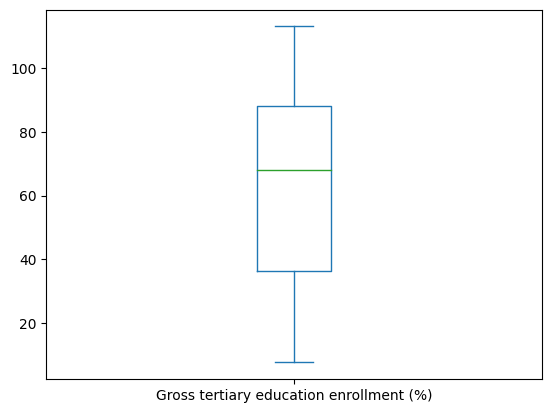



Population
null 123
count           872
mean      430387266
std       472794722
min          202506
25%        83355411
50%       328239523
75%       328239523
max      1397715000
Name: Population, dtype: int64


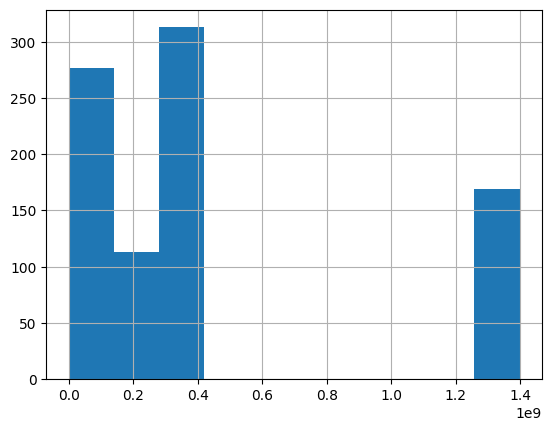

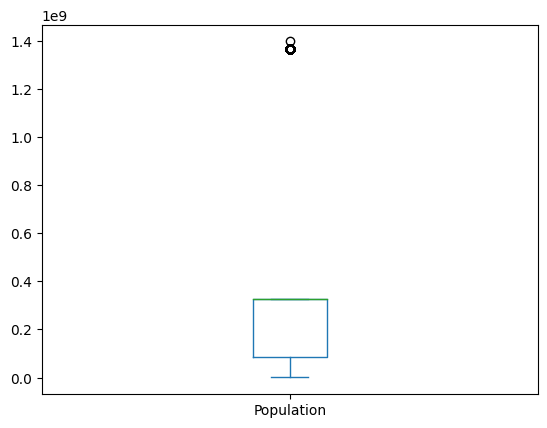



Unemployment rate
null 123
count    872
mean       9
std        4
min        0
25%        5
50%        9
75%       14
max       14
Name: Unemployment rate, dtype: int64


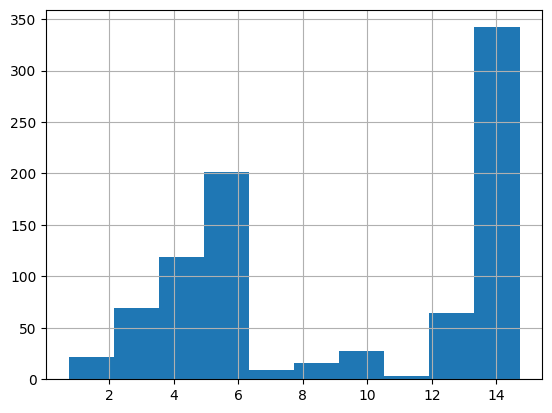

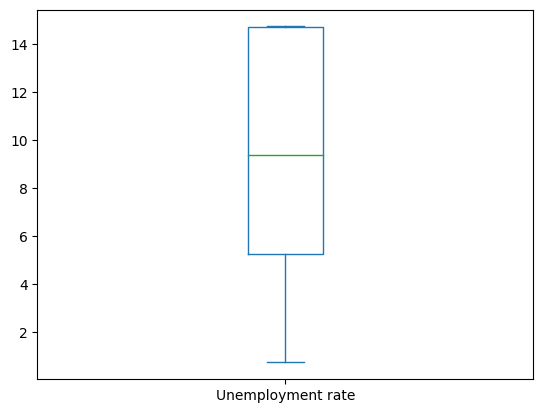



Urban_population
null 123
count          872
mean     224214981
std      154687362
min          35588
25%       55908316
50%      270663028
75%      270663028
max      842933962
Name: Urban_population, dtype: int64


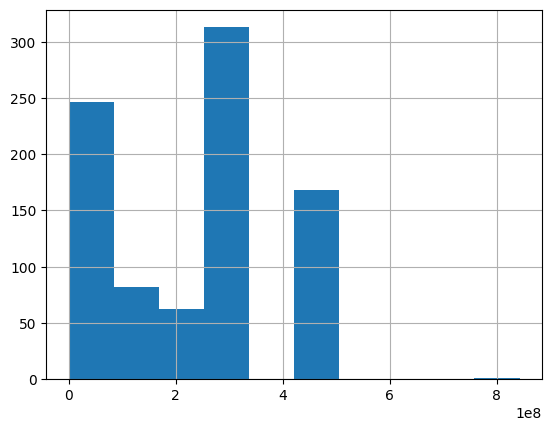

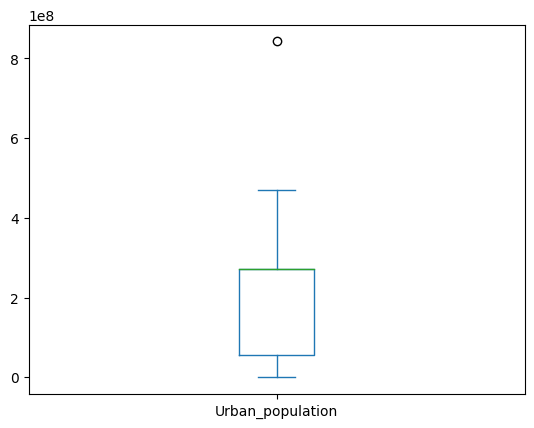



Latitude
null 123
count    872
mean      26
std       20
min      -38
25%       20
50%       37
75%       37
max       61
Name: Latitude, dtype: int64


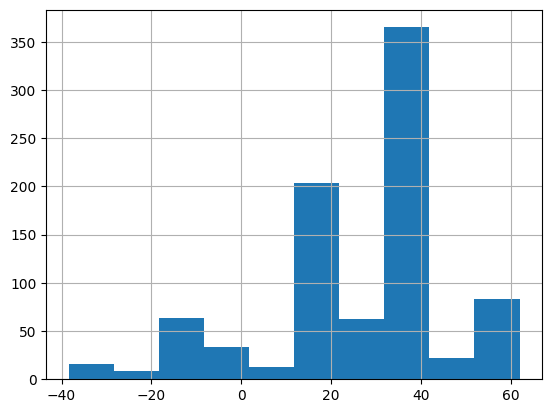

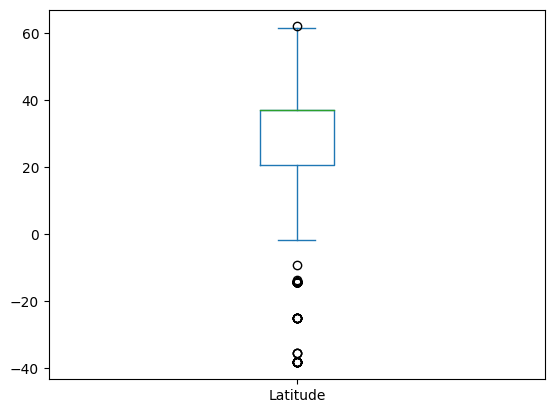



Longitude
null 123
count    872
mean     -14
std       84
min     -172
25%      -95
50%      -51
75%       78
max      138
Name: Longitude, dtype: int64


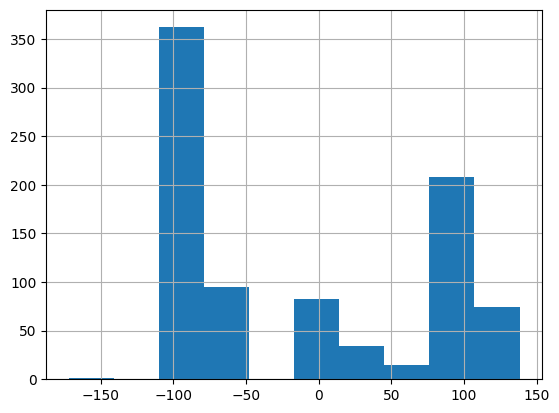

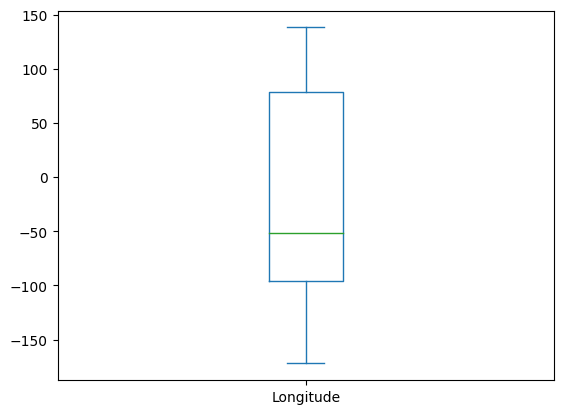

In [ ]:
print("shape", data.shape)
for col in (data.describe().columns):
    print(col)
    ser = data[col]
    print("null", ser.isna().sum())
    print(ser.describe().astype(int))
    ser.hist()
    plt.show()
    ser.plot(kind='box')
    plt.show()

    print("\n")

created_month
null 123
nunique 12


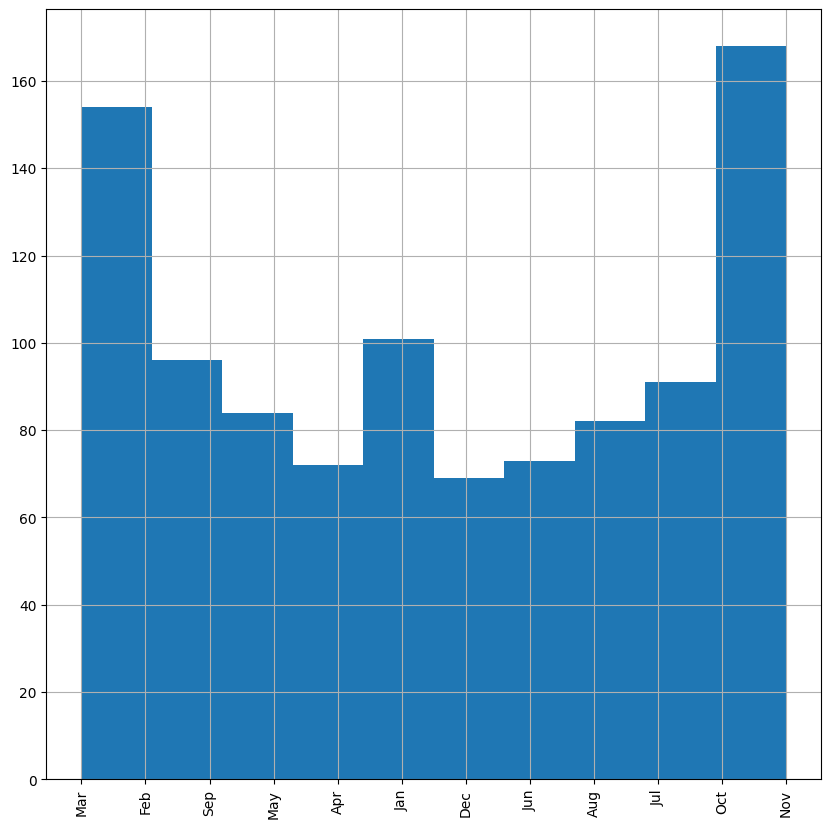



Country
null 123
nunique 49


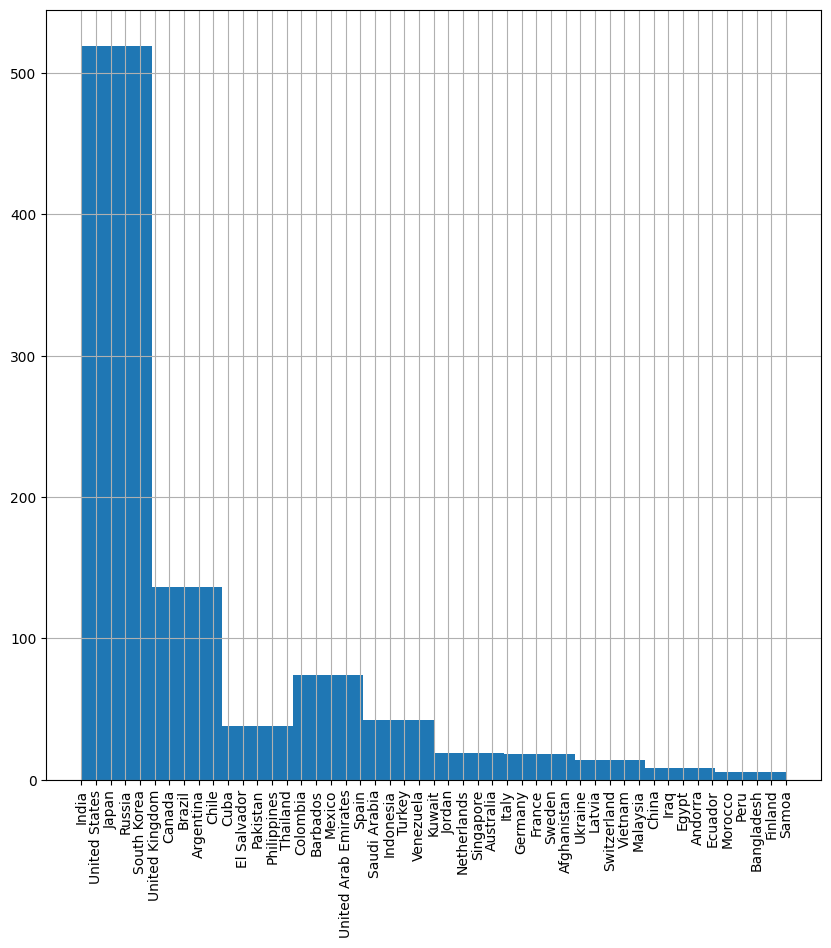



channel_type
null 123
nunique 14


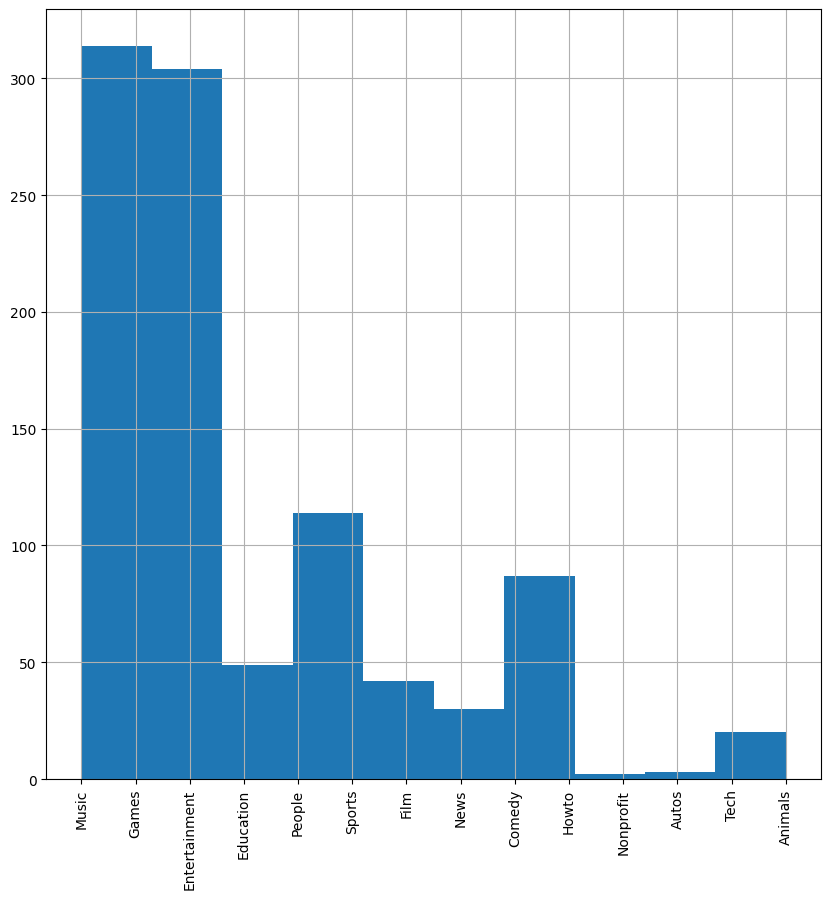



Youtuber
null 123
nunique 995


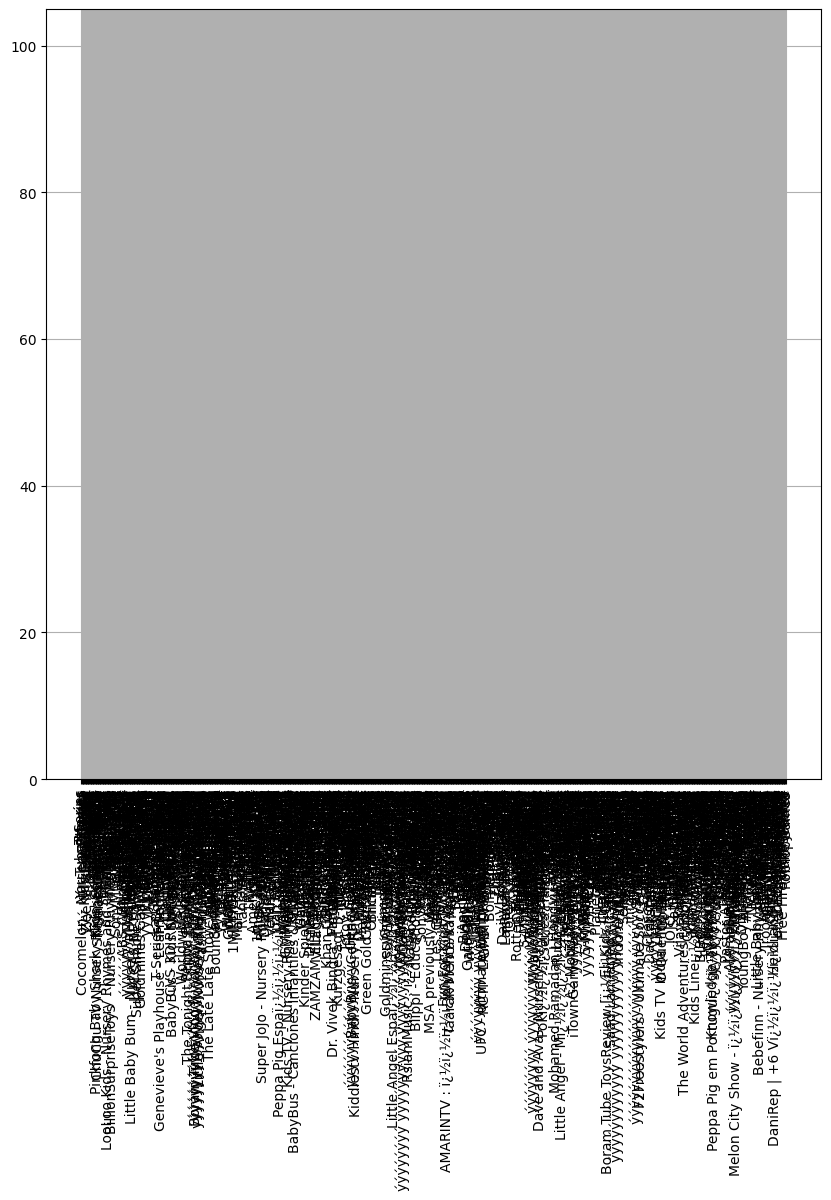



Title
null 123
nunique 992


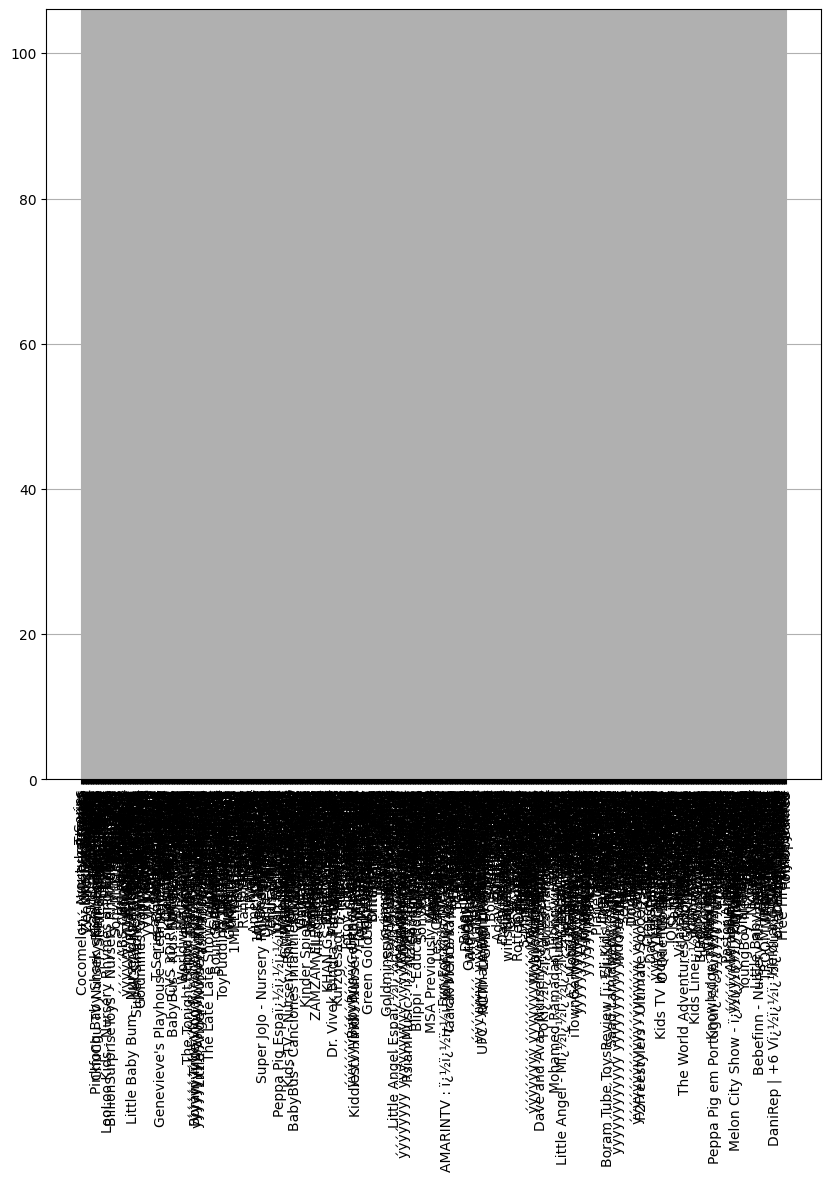



category
null 123
nunique 18


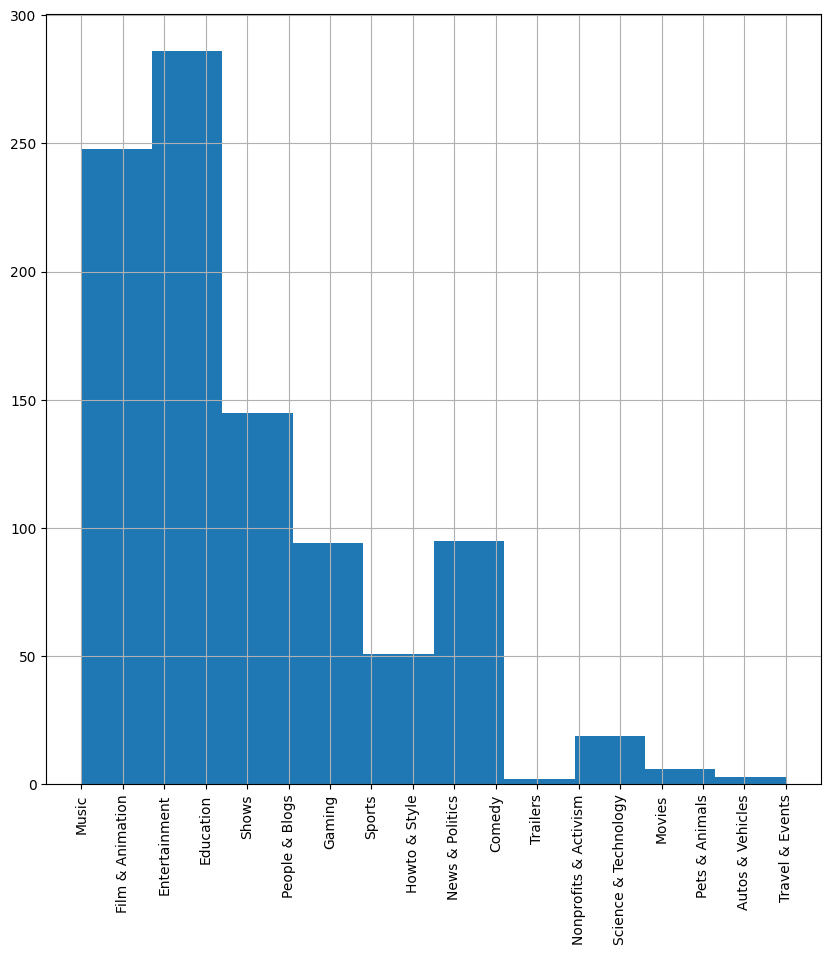



Abbreviation
null 123
nunique 49


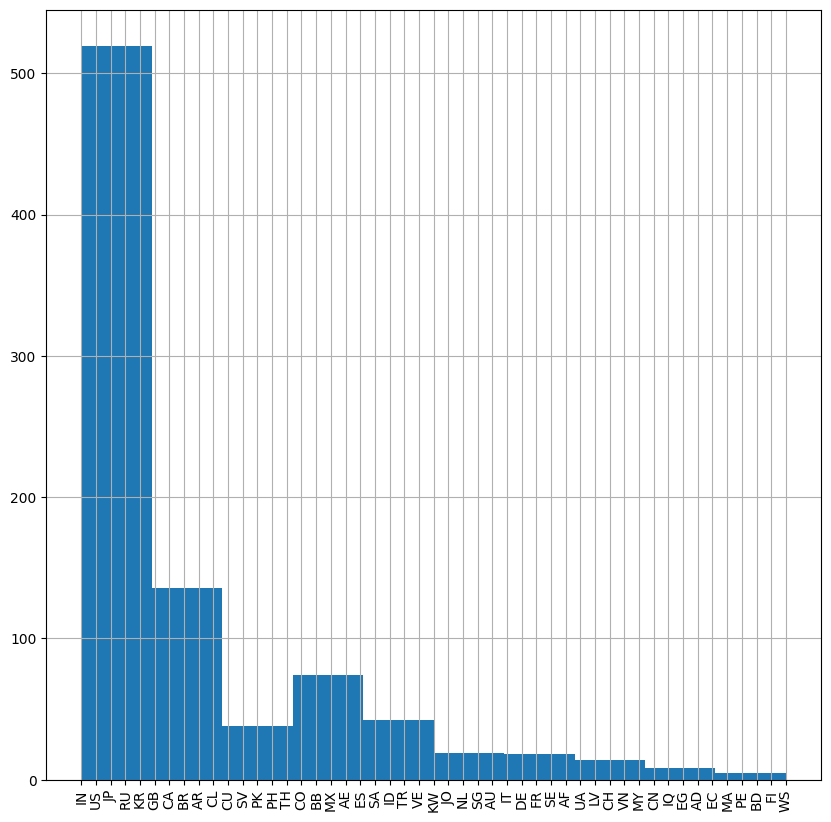

In [ ]:
for col in data[list(set(data.columns)-set(data.describe().columns))]:
    print(col)
    print("null", ser.isna().sum())
    print("nunique",data[col].nunique())
    data[col].hist(figsize=(10, 10))
    plt.xticks(rotation=90)
    plt.show()
    print("\n")

<ipython-input-7-875e480c35b2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


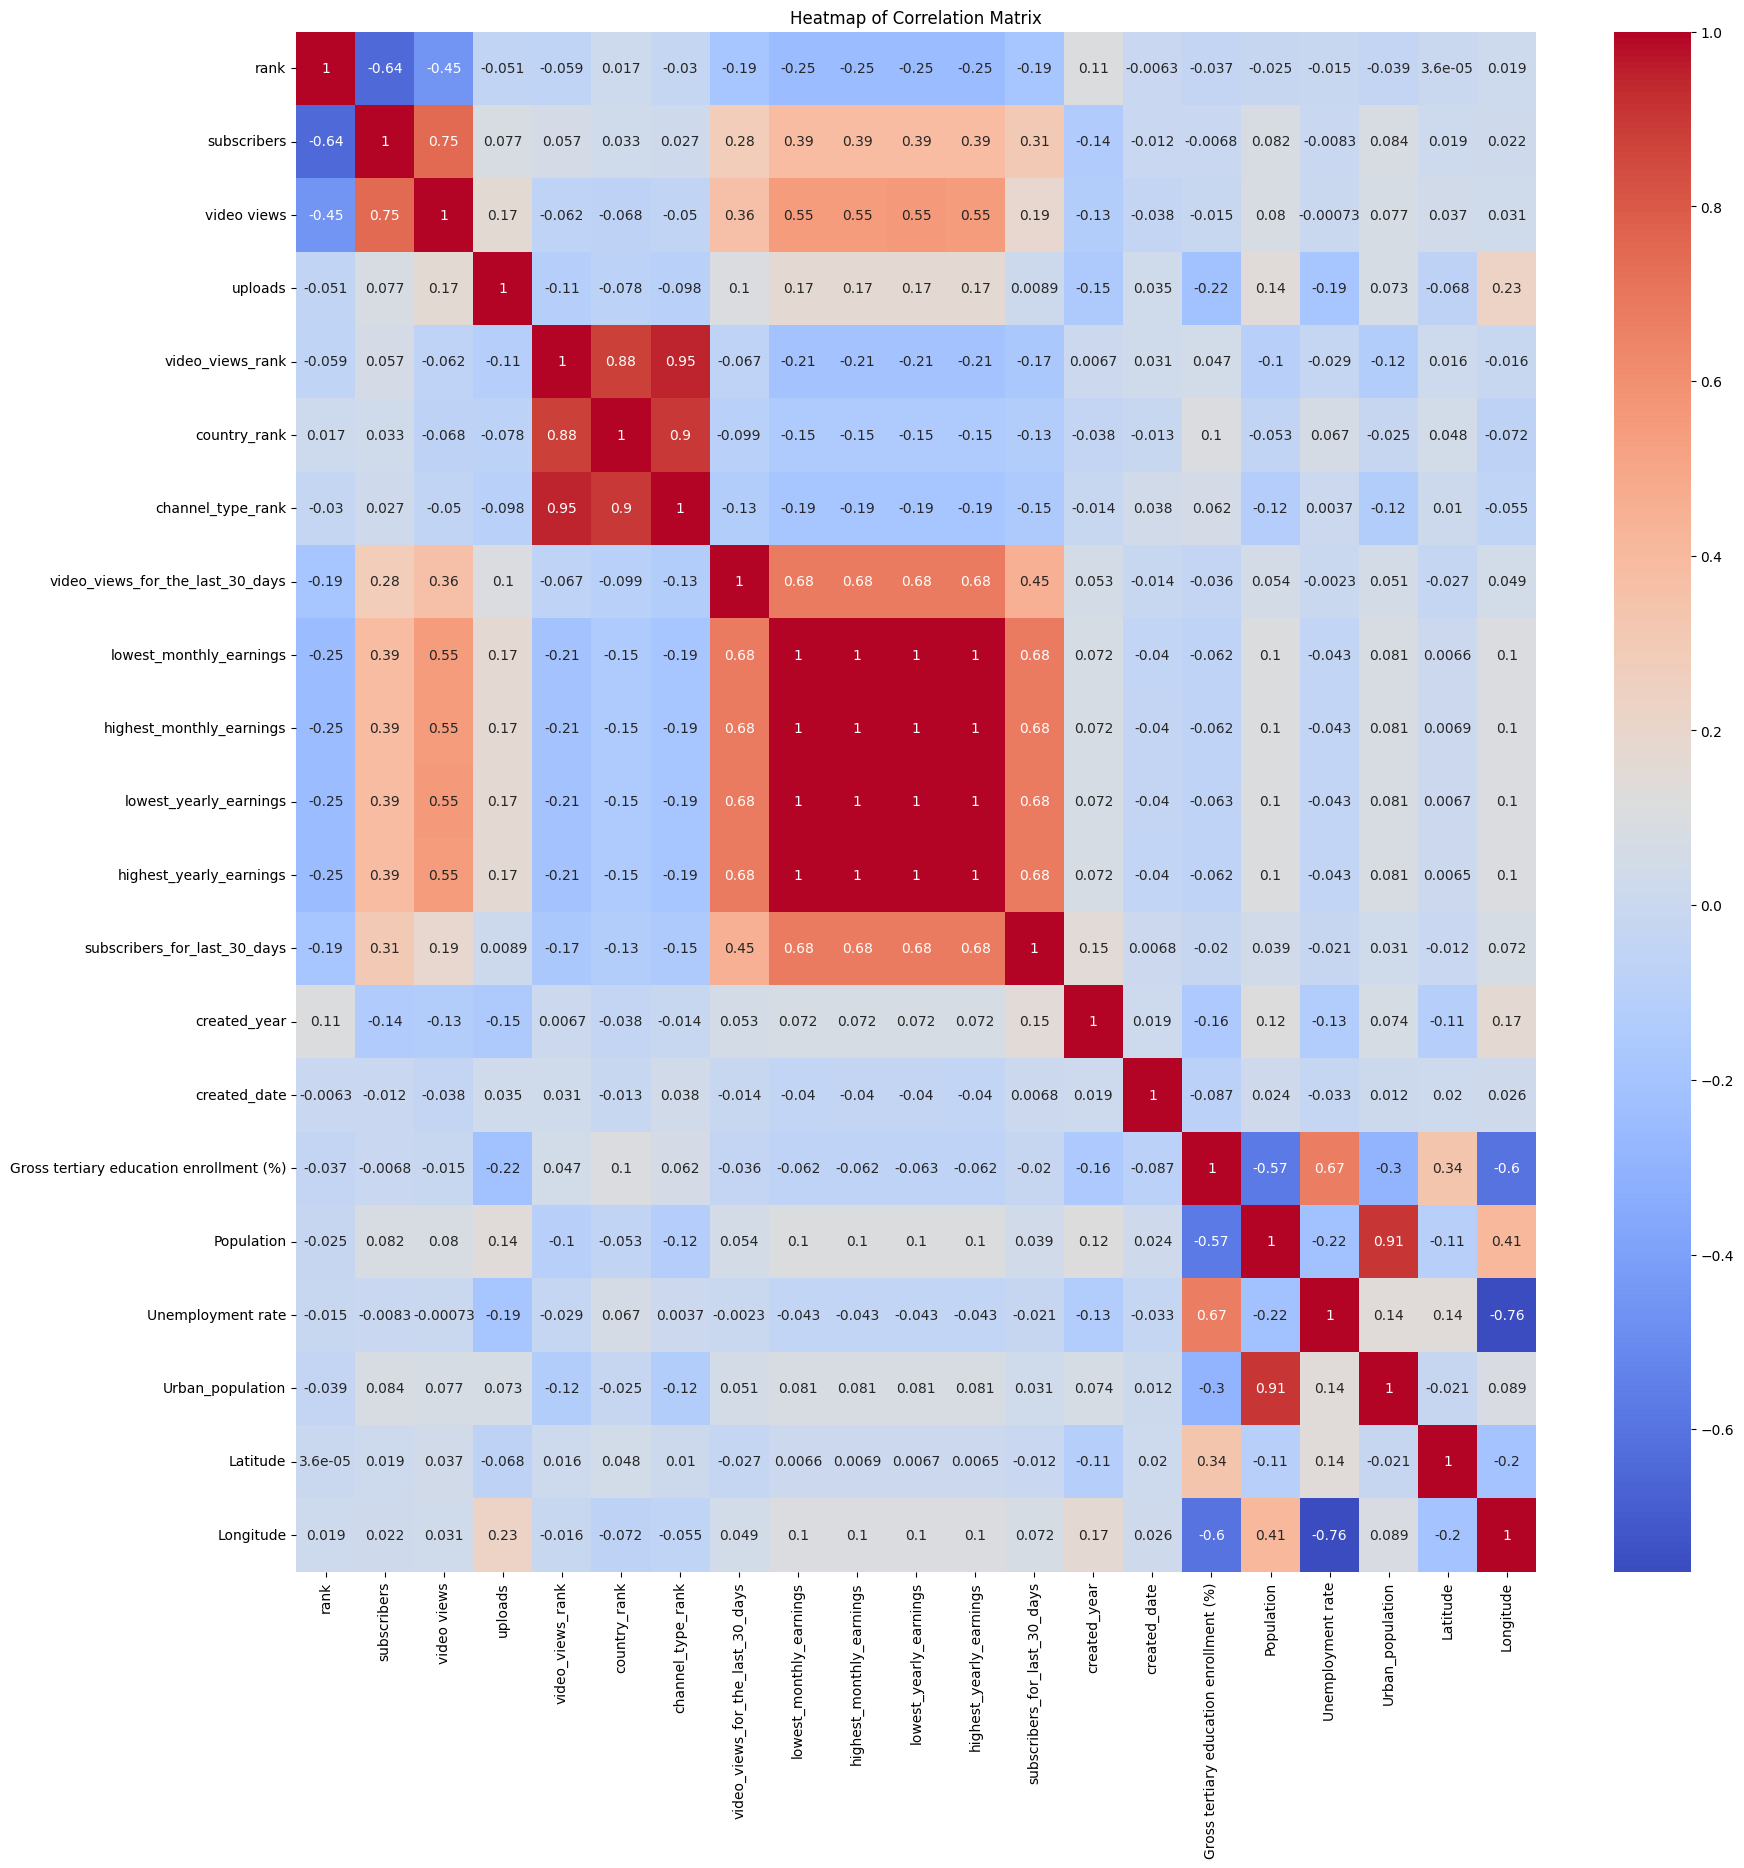

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Handling Missing Values, Outlier and Invalid Data

In [ ]:
for col in (data.describe().columns):
    print(col)
    ser = data[col]
    Q1 = ser.quantile(0.25)
    Q3 = ser.quantile(0.75)
    IQR = Q3 - Q1
    th = 1.5
    print("min",ser.min())
    # lower_limit = Q1 - th * IQR
    lower_limit = 10
    print("lower_limit",lower_limit)
    print("max",ser.max())
    upper_limit = Q3 + th * IQR
    print("upper_limit",upper_limit)
    # outliers = ser[(ser < lower_limit) | (ser > upper_limit)]
    outliers = ser[(ser < lower_limit)]
    print("outliers",list(outliers.astype(int)))
    print("\n")

rank
min 1
lower_limit 10
max 995
upper_limit 1492.0
outliers [1, 2, 3, 4, 5, 6, 7, 8, 9]


subscribers
min 12300000
lower_limit 10
max 245000000
upper_limit 39750000.0
outliers []


video views
min 0.0
lower_limit 10
max 228000000000.0
upper_limit 27454536517.5
outliers [0, 0, 0, 0, 0, 0, 0, 0]


uploads
min 0
lower_limit 10
max 301308
upper_limit 6377.0
outliers [1, 0, 0, 1, 1, 3, 1, 1, 1, 0, 8, 6, 0, 4, 1, 0, 5, 1, 0, 1, 2, 2, 0, 2, 0, 3, 0, 6, 3, 0, 2, 0, 1, 0, 5, 4, 0, 3, 0, 1, 0, 1, 6, 0, 1, 0, 6, 6, 0, 0, 0, 1, 1, 1, 0, 9, 2, 2, 0, 0, 0, 2, 0, 1, 1, 0, 3, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 8, 3, 3, 6, 1, 0, 3, 0, 7, 8, 1, 0, 8, 9, 0, 0, 1]


video_views_rank
min 1.0
lower_limit 10
max 4057944.0
upper_limit 8476.75
outliers [1, 2, 3, 5, 8, 7, 4, 9]


country_rank
min 1.0
lower_limit 10
max 7741.0
upper_limit 291.0
outliers [1, 1, 2, 2, 3, 1, 5, 5, 3, 6, 1, 5, 2, 1, 3, 6, 8, 1, 7, 8, 9, 9, 9, 1, 1, 1, 1, 1, 2, 3, 1, 4, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 6, 2, 7, 1

In [ ]:
# data[data['uploads']<10]

In [ ]:
data = data[data['uploads']>10] # during outlier analysis, there is invalid data for channels roughly having "upload" <=10 especaily in the "uploads" columsn
data['created_year'] = data['created_year'].where(data['created_year'] > 1970, 2005) # imputing the single outlier with "2005"
data['category'].fillna('NA', inplace=True)
data['Country'].fillna('NA', inplace=True)
data['Abbreviation'].fillna('NA', inplace=True)
data['channel_type'].fillna('NA', inplace=True)
data['country_rank'].fillna(-1, inplace=True)
data['channel_type_rank'].fillna(-1, inplace=True)
data['video_views_for_the_last_30_days'].fillna(-1, inplace=True)
data['Gross tertiary education enrollment (%)'].fillna(-1, inplace=True)
data['Population'].fillna(-1, inplace=True)
data['Unemployment rate'].fillna(-1, inplace=True)
data['Urban_population'].fillna(-1, inplace=True)
data['Latitude'].fillna(-1, inplace=True)
data['Longitude'].fillna(-1, inplace=True)

<ipython-input-10-d90c3e7acde4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['created_year'] = data['created_year'].where(data['created_year'] > 1970, 2005) # imputing the single outlier with "2005"
<ipython-input-10-d90c3e7acde4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category'].fillna('NA', inplace=True)
<ipython-input-10-d90c3e7acde4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [ ]:
# new feature "created_age_in_months" as number of month between today and date of creating of the channel
data['created_full_date'] = pd.to_datetime(data['created_year'].astype(int).astype(str) + '-' + data['created_month'] + '-' + data['created_date'].astype(int).astype(str))
current_date = pd.Timestamp.now()
data['created_age_in_months'] = (current_date.year - data['created_full_date'].dt.year) * 12 + current_date.month - data['created_full_date'].dt.month

data['subscribers_for_last_30_days'].fillna(data['subscribers']/data['created_age_in_months'], inplace=True) # imputing missing data with average monthly subscriber

<ipython-input-11-bb2a3c865e93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['created_full_date'] = pd.to_datetime(data['created_year'].astype(int).astype(str) + '-' + data['created_month'] + '-' + data['created_date'].astype(int).astype(str))
<ipython-input-11-bb2a3c865e93>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['created_age_in_months'] = (current_date.year - data['created_full_date'].dt.year) * 12 + current_date.month - data['created_full_date'].dt.month
<ipython-input-11-bb2a3c865

In [ ]:
data.isna().sum()

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_date                               0
Gross tert

# Features

In [ ]:
# new feature "video views_per_upload" as the ratio if number of "video views" to "uploads"
data['video views_per_upload'] = data['video views']/data['uploads']

In [ ]:
features = ['video views_per_upload', 'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings','highest_yearly_earnings', 'subscribers_for_last_30_days','created_age_in_months',
            'Gross tertiary education enrollment (%)', 'Population','Unemployment rate','Urban_population','category',
            'Country','channel_type']

num_features = list(data[features].describe().columns)
cat_features = list(set(data[features].columns)-set(data[features].describe().columns))

# Success factors of top YouTube channels

In [ ]:
# channel successful as those channels with rank 1-50
data['channel_successful'] = [1 if x<=51 else 0 for x in data['rank']]

In [ ]:
# using Random Forest Classifier to estimate the feature importance, thus highlighting the factors for prediction of success

target_column_name = 'channel_successful'
X = data[features]
y = data[target_column_name]
X = pd.get_dummies(X, columns=cat_features)
X_final_features = list(X.columns)
X = X.values
y = y.values

In [ ]:
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced')
skf = StratifiedKFold(n_splits=5)

feature_importances = []
accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf.fit(X_train, y_train)
    feature_importances.append(clf.feature_importances_)

    predictions = clf.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

avg_importance = np.mean(feature_importances, axis=0)
avg_accuracy = np.mean(accuracies)

In [ ]:
print("model accuracy on 5 fold cross validation", avg_accuracy)

model accuracy on 5 fold cross validation 0.9461615717782939


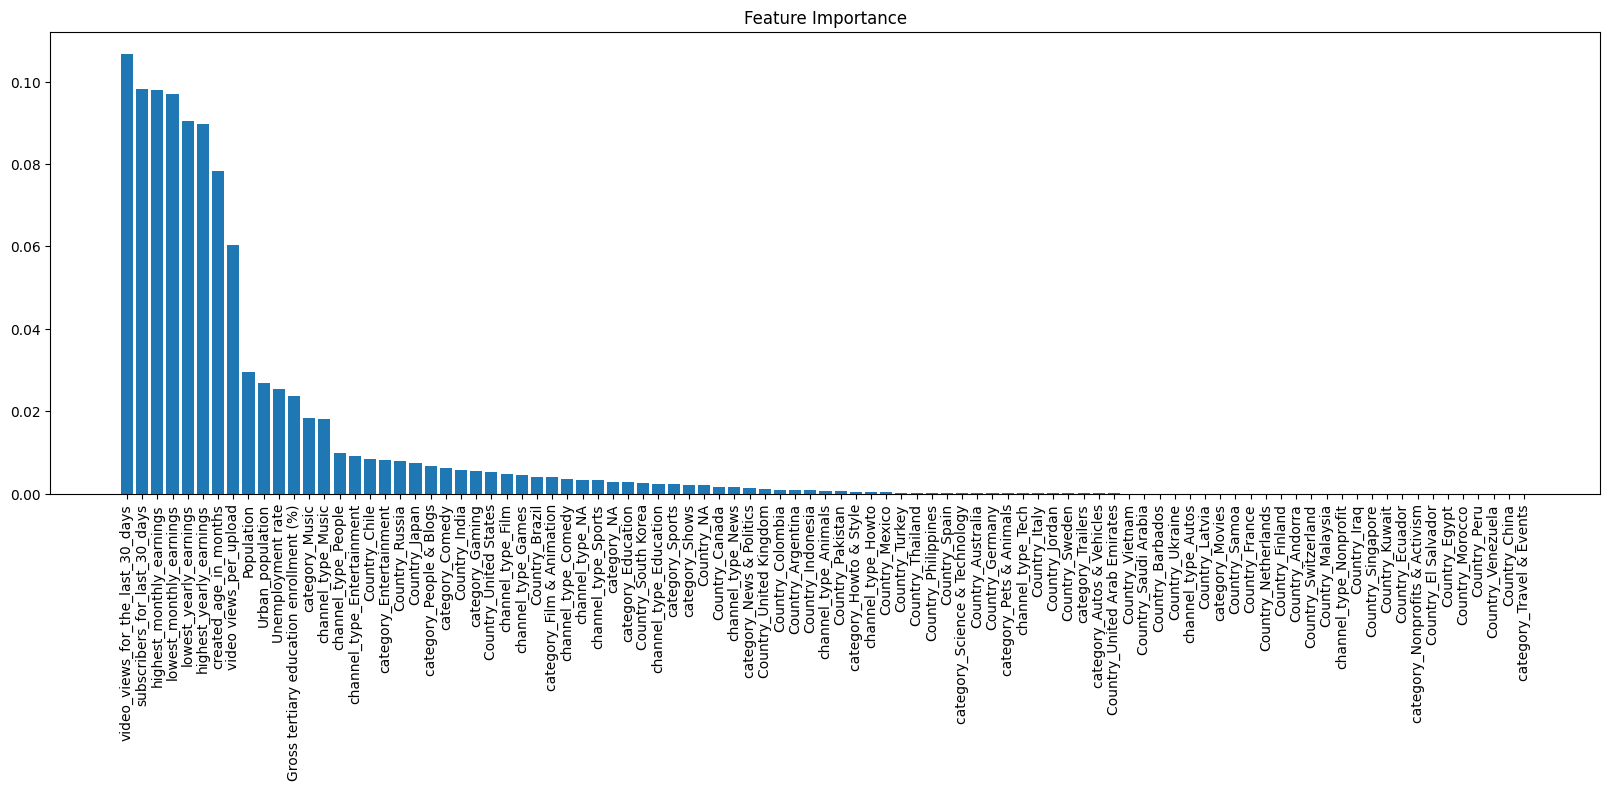

In [ ]:
indices = np.argsort(avg_importance)[::-1]
names = [X_final_features[i] for i in indices]

plt.figure(figsize=(20, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), avg_importance[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()

# Popular Categories

In [ ]:
sum_data = pd.DataFrame({
    'uploads_sum': data.groupby(['category'])['uploads'].sum(),
    'video views_per_upload_mean': data.groupby(['category'])['video views_per_upload'].mean()
    }).reset_index()

<ipython-input-21-1f6b8b011719>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sum_data['category'], rotation=90)


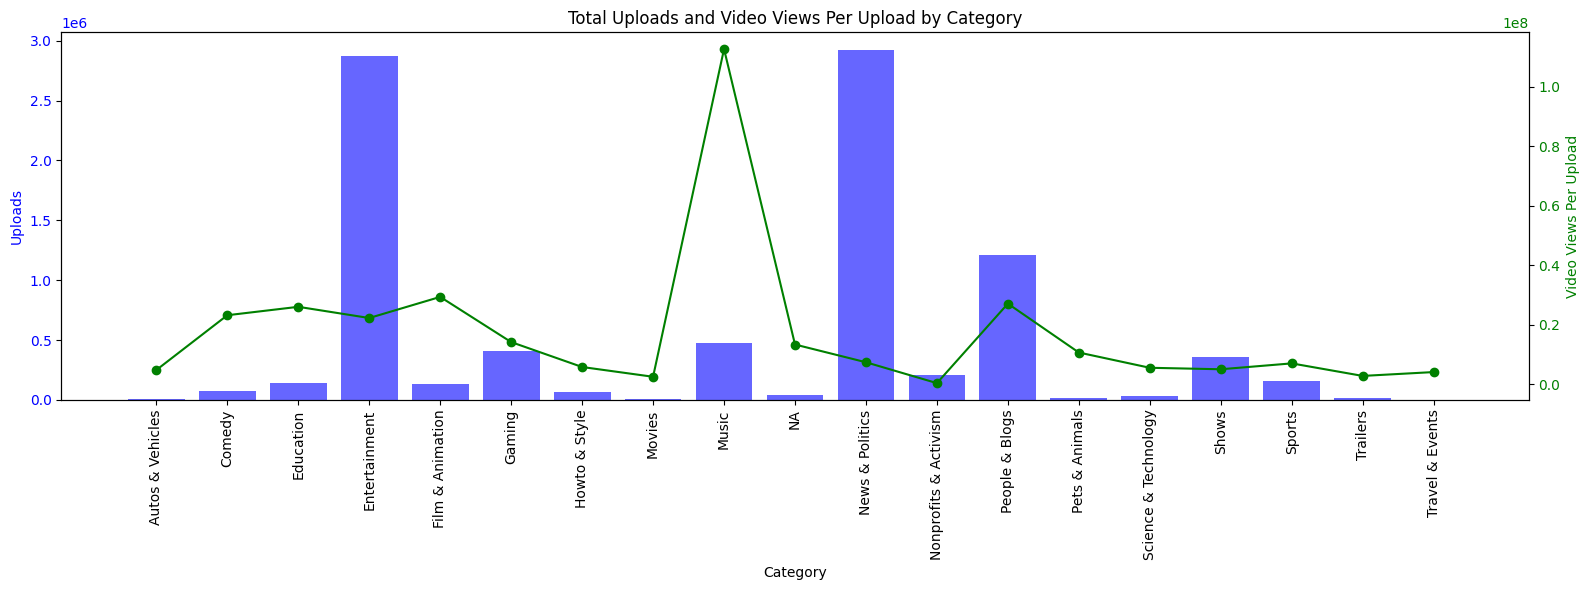

In [ ]:
fig, ax1 = plt.subplots(figsize=(16, 6))

ax1.bar(sum_data['category'], sum_data['uploads_sum'], color='blue', alpha=0.6, label='uploads')
ax1.set_xlabel('Category')
ax1.set_ylabel('Uploads', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(sum_data['category'], rotation=90)

ax2 = ax1.twinx()
ax2.plot(sum_data['category'], sum_data['video views_per_upload_mean'], color='green', marker='o', label='Profit')
ax2.set_ylabel('Video Views Per Upload', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Total Uploads and Video Views Per Upload by Category')
fig.tight_layout()

plt.xticks(rotation=90)
plt.show()

# Impact of Regional Influencers on Global Scale

In [ ]:
# selecting top influencer for a country as channel having country_rank as 1, since many country have very few data points

data['country_rank_top'] = [1 if x==1 else 0 for x in data['country_rank']]
data['total_view_views'] = data['video views'].sum()
data_country_rank_top = data[data['country_rank_top']==1]
data_country_rank_top['video views global impact'] = (data_country_rank_top['video views'] / data_country_rank_top['total_view_views'])*100
data_country_rank_top = data_country_rank_top.sort_values(by='video views global impact', ascending=False)
data_country_rank_top['Country_Youtuber'] = data_country_rank_top["Youtuber"].str[:10] + ' (' + data_country_rank_top["Country"] + ')'

<ipython-input-22-bf7b2ffdabf4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_country_rank_top['video views global impact'] = (data_country_rank_top['video views'] / data_country_rank_top['total_view_views'])*100


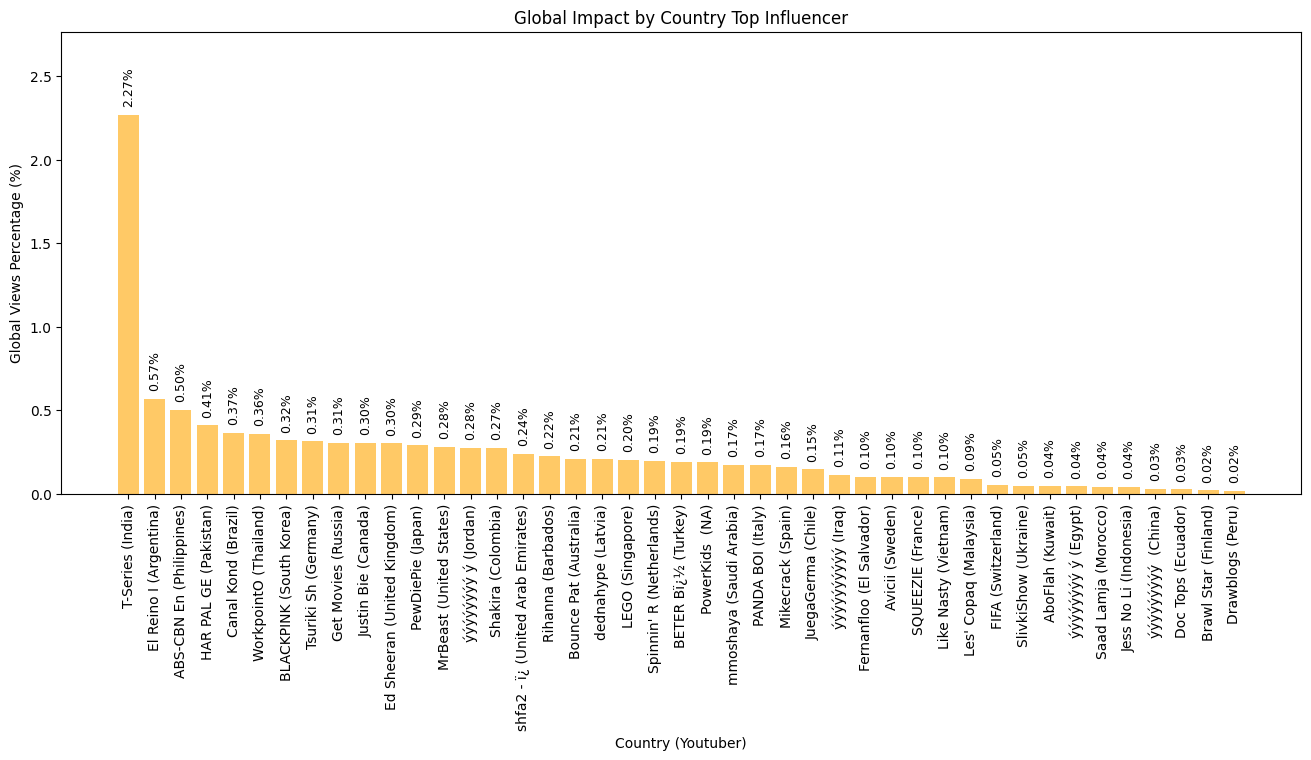

In [ ]:
plt.figure(figsize=(16, 6))
plt.bar(data_country_rank_top['Country_Youtuber'], data_country_rank_top['video views global impact'], color='orange', alpha=0.6)

for i, v in enumerate(data_country_rank_top['video views global impact']):
    plt.text(i, v + 0.05, f"{v:.2f}%", ha='center', va='bottom', fontsize=9, rotation=90)

plt.ylabel('Global Views Percentage (%)')
plt.xlabel('Country (Youtuber)')
plt.title('Global Impact by Country Top Influencer')
plt.ylim(0, data_country_rank_top['video views global impact'].max() + 0.5)
plt.xticks(rotation=90)

plt.show()

# Correlation between channel performance and estimated earnings

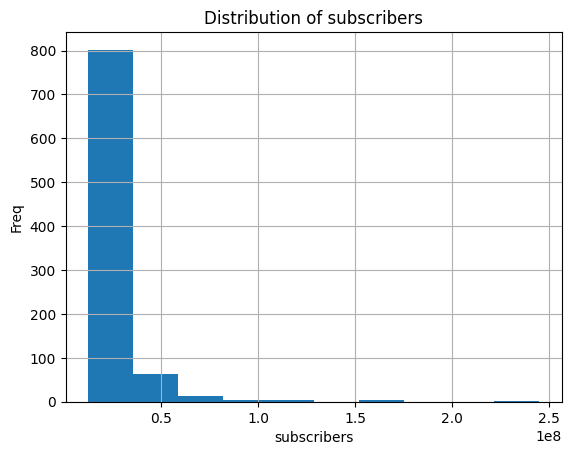

In [ ]:
data.subscribers.hist()
plt.title('Distribution of subscribers')
plt.xlabel('subscribers')
plt.ylabel('Freq')
plt.show()

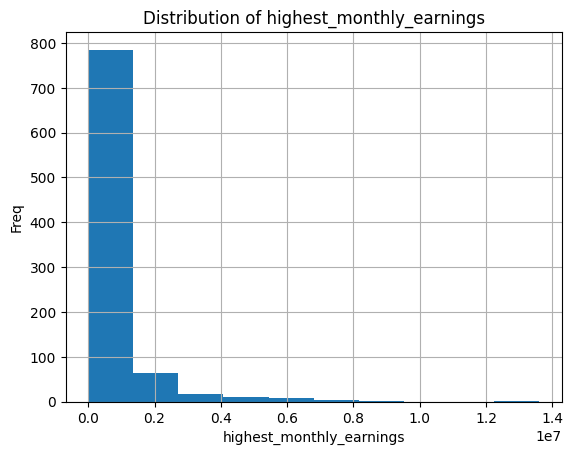

In [ ]:
data.highest_monthly_earnings.hist()
plt.title('Distribution of highest_monthly_earnings')
plt.xlabel('highest_monthly_earnings')
plt.ylabel('Freq')
plt.show()

In [ ]:
# distribution of subscribers and highest_monthly_earnings is highly skewed, therefore using spearman's rank test for correlation estimation
correlation, p_value = spearmanr(data['subscribers'], data['highest_monthly_earnings'])

In [ ]:
print('correlation', correlation)
print('p_value',p_value)

correlation 0.3538706672204041
p_value 1.1174717030436138e-27


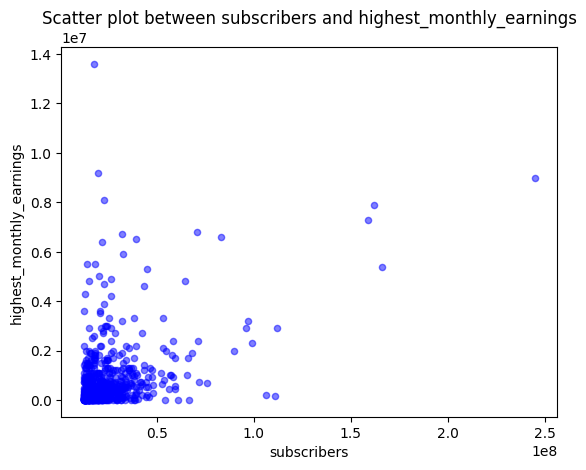

In [ ]:
data.plot.scatter(x='subscribers', y='highest_monthly_earnings', color='blue', alpha=0.5)

plt.title('Scatter plot between subscribers and highest_monthly_earnings')
plt.xlabel('subscribers')
plt.ylabel('highest_monthly_earnings')
plt.show()

# Geospatial Visualization and Analysis

In [ ]:
geo_data = pd.DataFrame({
    'subscribers_sum': data.groupby(['Country', 'Longitude', 'Latitude'])['subscribers'].sum(),
    'video views_per_upload_mean': data.groupby(['Country', 'Longitude', 'Latitude'])['video views_per_upload'].mean()
    }).reset_index()

In [ ]:
geo_data['subscribers_sum_ratio'] = (geo_data['subscribers_sum']/geo_data['subscribers_sum'].sum())*1000
geo_data['video views_per_upload_mean_ratio'] = (geo_data['video views_per_upload_mean']/geo_data['video views_per_upload_mean'].sum())

In [ ]:
geo_data = geo_data[geo_data['Country']!='NA']

<ipython-input-32-018de435ccca>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


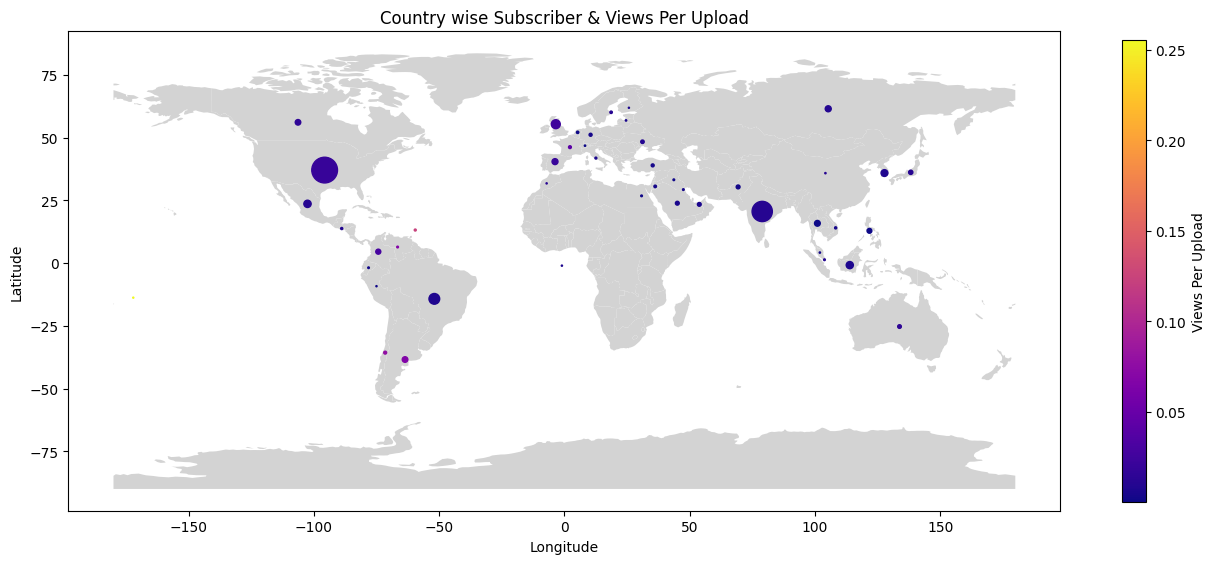

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(16, 10))
world.plot(ax=ax, color='lightgrey')

sc = ax.scatter(geo_data.Longitude, geo_data.Latitude, s=geo_data['subscribers_sum_ratio'], c=geo_data['video views_per_upload_mean_ratio'], cmap='plasma')

plt.colorbar(sc, ax=ax, label='Views Per Upload', shrink=0.6)
ax.set_title('Country wise Subscriber & Views Per Upload')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()